In [ ]:
# Modelagem preditiva

Esse é o nosso ponto de partida! Aqui vamos aprender passo a passo como construir, avaliar e refinar um modelo preditivo.

<b> Lembre-se: </b> qual a pergunta, problema de negócio ou hipótese que você quer responder com um modelo preditivo?

## Importando bibliotecas

Normalmente reservamos a parte superior do notebook para importar alguns pacotes comumente utilizados. Essa é uma boa hora para tentar executar os comandos abaixo e verificar se esses pacotes estão disponíveis:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

Para mostrar e gravar adequadamente os gráficos do pacote matplotlib, vamos utilizar o seguinte comando: (no jupyter notebook, há funções especiais que começam com "%", são chamadas <b> funções mágicas </b>. Vamos nos deparar com mais algumas ao longo desse treinamento:

In [1]:
%matplotlib inline

<b> <font color="red"> Oops..algum problema? </font> </b>

Provavelmente você não instalou alguma das bibliotecas que está tentando importar. Se você viu na mensagem de erro <b> <font color='red'> ModuleNotFoundError </font> </b>, isso é fácil de resolver! Vamos mostrar duas opções. A primeira é instalar por aqui mesmo:

Todo comando do terminal pode ser feito aqui também, é só colocar o <font color='red'> ! </font> antes:

In [43]:
# !pip install pandas

Como segunda opção, você pode abrir um prompt de comando (digite "prompt" ou "terminal" na barra de pesquisa do Windows. <b> Não se esqueça de ativar seu ambiente virtual antes de tentar instalar a biblioteca </b>

<b> Ainda com problemas? <b/>

É possível que a rede corporativa não tenha reconhecido o certificado SSL para fazer a conexão e baixar o pacote. Você pode tentar o seguinte:

In [44]:
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pandas

No lugar do pandas, pode substituir por qualquer biblioteca que esteja tentando instalar

# Regressão Linear

Em uma regressão, estamos interessados em predizer uma resposta numérica. Vamos começar com um caso especial de regressão, a <b> <font color='blue'> regressão linear  </font> </b>:

In [4]:
# criando um dataset sintético:
X = np.random.normal(5, 3, 1000)
y = 2*X + np.random.normal(0, 2, 1000) + 5
dados = pd.DataFrame(zip(X,y), columns=['X', 'y'])

In [5]:
dados.head()

,X,y
0,6.102135,16.386777
1,6.749927,20.063334
2,3.251861,12.987196
3,6.354770,15.068302
4,-0.519032,2.222356


Text(0.5, 0, 'X - variável independente')

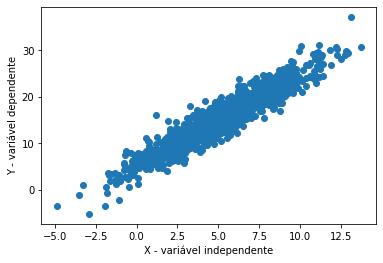

In [6]:
fig = plt.scatter(dados['X'], dados['y'])
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')

In [7]:
from IPython.display import Math #para escrever equações 

 <b> Primeiramente </b>: por que queremos encontrar a equação de uma reta que melhor se ajuste aos nossos dados? 

In [8]:
Math(r'y_{predito} = a*x + b')

<IPython.core.display.Math object>

Na regressão linear, o objetivo é encontrar os coeficientes da equação da reta que minimizam a soma dos erros quadráticos:

In [9]:
Math(r'Erro = \sum_{i} (y_{real} - y_{predito} )^2 ')

<IPython.core.display.Math object>

<b> <font color='red'> Mas como? </font> Método dos mínimos quadrados </b>

<IPython.core.display.Javascript object>


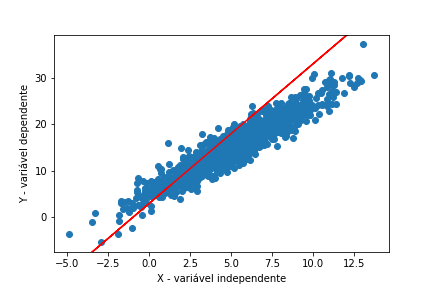

interactive(children=(FloatSlider(value=3.0, description='a', max=9.0, min=-3.0), FloatSlider(value=3.0, descr…

In [10]:
%matplotlib notebook
from ipywidgets import *

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')
scatter = ax.scatter(dados['X'], dados['y'])
line, = ax.plot(dados['X'], dados['X'], color='red')

def update(a = 3.0, b=3.0):
    line.set_ydata(a*dados['X'] + b)
    fig.canvas.draw_idle()

interact(update);

O erro é minimo quando sua derivada em função dos parâmetros (a) e (b) é igual a zero. Isso torna o processo de descobrir os coeficientes ótimos numa simples resolução de um sistema de equações lineares.

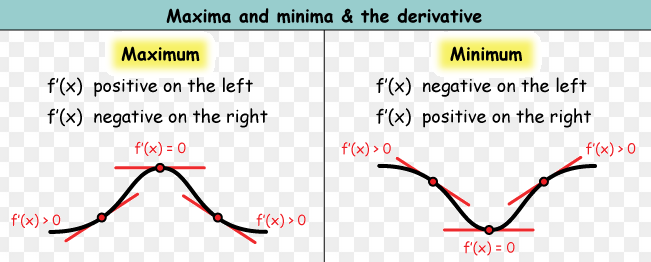

In [14]:
Image('../figures/derivative.png')

Para mais detalhes: https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc

Nesse caso simplificado, ja podemos identificar alguns componentes de uma tarefa de aprendizado supervisionado:

- Variável dependente: y (depende de X). A resposta do modelo
- Variável/Variáveis independentes (X). As entradas do modelo
- Parâmetros: a, b: são aprendidos no <b> <font color='blue'> treinamento </font> </b> do modelo 
- Função de erro: objetivo do treinamento é minimizar essa função

No aprendizado supervisionado, fornecemos a resposta correta (seja o y real, ou um rótulo) ao modelo para determinar quão próximo ele está se ajustando. 

## Criando e ajusando um modelo com o sklearn

O sklearn possui uma implementação para ajustar modelo linear:

In [15]:
from sklearn.linear_model import LinearRegression

<b> <font color="blue"> IMPORTANTE </font> </b> 

- O sklearn é possui uma padronização em todos seus modelos, não importa se forem regressões lineares ou outros métodos de machine learning. Primeiramente instanciamos um modelo. No comando abaixo, aproveite para entender que tipo de variável "modelo" irá ser atribuido 

In [16]:
modelo = LinearRegression()

In [17]:
modelo

LinearRegression()

- O modelo é um objeto. Objetos possuem metodos, como o .fit () e o .predict()

Se você digitar o nome do método sem ( )'s , sua origem será indicada: 

In [18]:
modelo.fit

<bound method LinearRegression.fit of LinearRegression()>

Você também pode inspecionar um docstring, e até o código fonte que essa função executa:

In [ ]:
??modelo.fit

In [19]:
modelo.fit(X=dados['X'].values.reshape(-1,1), y=dados['y'])

LinearRegression()

O método fit recebe dois argumentos: um array X (entradas) e um array y (respostas). Nesse caso X tem somente uma dimensão, precisamos ajustar seu formato para uma matriz. Quando X possui mais de uma dimensão (2+ variáveis preditoras), podemos especificar diretamente um subset de um dataframe do pandas. Outra alternativa é simplesmente adicionar um  [ ]'s a mais envolvendo o X

In [20]:
modelo.fit(dados[['X']], dados['y'])

LinearRegression()

Modelo ajustado! Agora podemos utilizar esse mesmo objeto para realizar predições, ou inferências:

In [21]:
modelo.predict(dados[['X']])

array([17.16544418, 18.44725856, 11.52548415, 17.66534336,  4.06385488,
       19.79846599,  5.33271951, 13.1207372 , 13.91187843,  5.91416829,
       21.73799743, 21.13958304, 13.64727726, 19.164311  , 21.17225552,
       12.80246644,  9.47964464, 12.20180879,  9.80920509, 16.93010733,
       13.06791807,  6.55847895, 14.85656216, 13.04384254, 20.44547417,
       14.59675499,  1.7293046 ,  8.45210872, 21.0196225 , 13.74660892,
       13.52358518, 12.96875897, 18.71076533, 20.37215636,  6.21001819,
        9.12426353, 13.43725828, 10.50687411,  8.11353918, 15.54491848,
        8.73163843, 14.76175146, 11.02587913,  4.36047602, 19.54413636,
       13.16222435, 13.70845457, 19.17845559, 19.4364048 , 13.27616161,
       20.5579074 , 17.66218528, 10.32961618,  6.21954622, 16.33257562,
       11.20910212, 16.11974799,  8.34242409, 14.12147392,  9.86742952,
        2.44265711, 14.94420136, 18.93640791, 21.47334256, 19.41952264,
        9.55796481,  7.64489706, 15.43507927, 19.74918833, 14.84

As predições podem ser armazenadas como uma coluna do dataframe:

## Realizando predições

In [22]:
%matplotlib inline

In [24]:
dados['y_predito'] = modelo.predict(dados[['X']])

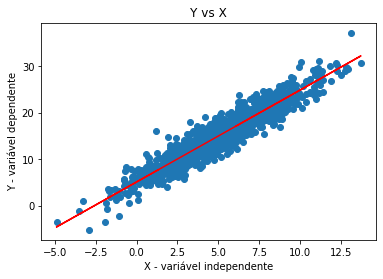

In [25]:
plt.scatter(dados['X'], dados['y'])
plt.plot(dados['X'], dados['y_predito'], color='red')
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')
plt.title('Y vs X')
plt.show()

No objeto <b> modelo </b>, também podemos verificar o valor dos coeficientes ajustados:

In [26]:
a, b = modelo.coef_[0], modelo.intercept_

In [27]:
print(f"Coeficiente angular (a) = {a}, Intercepto (b) = {b}")

Coeficiente angular (a) = 1.9787431143689695, Intercepto (b) = 5.090886251790021


Ou seja, a equação da reta nesse caso é:

\begin{align}
Y = a*X + b
\end{align}

<font color="blue"> <b> Qual o significado de a e b? </b> </font>

## Quão bom foi o ajuste? 

O sklearn possui um módulo dedicado com funções para calcular métricas do modelo

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Erro médio absoluto:

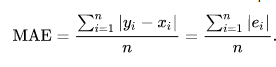

In [29]:
Image('../figures/MAE.png')

Coeficiente de determinação (% variabilidade explicada)

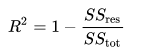

In [30]:
Image('../figures/r2_scores.png')

In [ ]:
Image('../figures/ssres.png')

In [ ]:
Image('../figures/sstot.png')

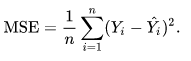

In [31]:
Image('../figures/mse.png')

In [32]:
metricas_do_modelo = {
    'R2': r2_score(y_true = dados['y'], y_pred=dados['y_predito']),
    'MAE': mean_absolute_error(y_true = dados['y'], y_pred=dados['y_predito']),
}

Podemos fazer de forma dinâmica:

In [33]:
score_funcs = [r2_score, mean_absolute_error, mean_squared_error]

metricas_do_modelo = {}
for funcao in score_funcs:
    metricas_do_modelo[funcao.__name__] = funcao(y_true=dados['y'], y_pred=dados['y_predito'])


In [34]:
metricas_do_modelo


{'r2_score': 0.8866624084232779,
 'mean_absolute_error': 1.6400074772933422,
 'mean_squared_error': 4.220594892038474}

In [35]:
pd.DataFrame([metricas_do_modelo])

,r2_score,mean_absolute_error,mean_squared_error
0,0.886662,1.640007,4.220595


## Efeito de um outlier

O que acontece quando os dados possuem outliers? Vamos simular:

In [36]:
dados.loc[500, 'y'] = 500

In [37]:
modelo.fit(X=dados['X'].values.reshape(-1,1), y=dados['y'])

LinearRegression()

In [105]:
dados['y_predito'] = modelo.predict(dados[['X']])

KeyError: "None of [Index(['X'], dtype='object')] are in the [columns]"

In [39]:
score_funcs = [r2_score, mean_absolute_error, mean_squared_error]

metricas_do_modelo = {}
for funcao in score_funcs:
    metricas_do_modelo[funcao.__name__] = funcao(y_true=dados['y'], y_pred=dados['y_predito'])


In [40]:
pd.DataFrame([metricas_do_modelo])

,r2_score,mean_absolute_error,mean_squared_error
0,0.081026,2.374023,249.893837


Text(0.5, 0, 'X - variável independente')

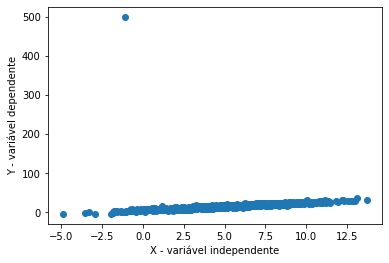

In [41]:
fig = plt.scatter(dados['X'], dados['y'])
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')

In [42]:
a, b = modelo.coef_[0], modelo.intercept_

In [43]:
print(f"Coeficiente angular (a) = {a}, Intercepto (b) = {b}")

Coeficiente angular (a) = 1.6164046690961338, Intercepto (b) = 7.4050584961176895


In [44]:
#removendo o outlier e substituindo pela mediana
dados.loc[500, 'y'] = dados['y'].median()

<b> <font color="blue"> IMPORTANTE </font> </b> 

Atente-se ao fato que acabamos de medir o erro do modelo com os dados de treinamento. Quando falamos em modelagem preditiva, queremos ter uma ideia de qual será seu erro em novas obervações, então será que essa forma de estimar o erro é a mais adequada? Falaremos sobre isso em breve! 

## As métricas de desempenho são suficientes?

<b> Um modelo de regressão linear se baseia em premissas. Mesmo com um baixo erro ou alto R², se elas não tiverem sendo respeitadas, há grande risco de que as conclusões tiradas sejam inválidas.

- A variável resposta (y) deve ter uma relação linear com as variáveis independentes (explanatórias ou preditoras) (X);
- O erro residual (yreal - ypred) deve aleatório (independente e identicamente distribuído)
- O resíduo deve ter distribuição normal
- O resíduo deve ter homoscedasticidade (variância constante)

https://towardsdatascience.com/assumptions-of-linear-regression-5d87c347140

## Inspecionando o resíduo do modelo

In [104]:
dados['residuo'] = dados['y_predito'] - dados['y']

KeyError: 'y_predito'

Text(0.5, 1.0, 'Histograma dos resíduos')

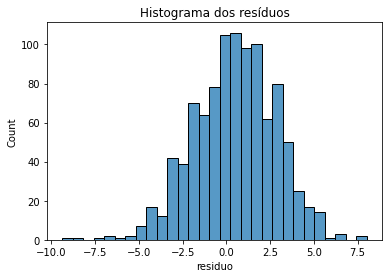

In [46]:
hist = sns.histplot(dados['residuo'])
plt.title("Histograma dos resíduos")

Text(0.5, 1.0, 'Resíduo versus y')

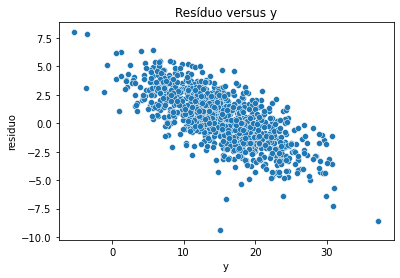

In [47]:
sns.scatterplot(y = dados['residuo'], x = dados['y'])
plt.title('Resíduo versus y')

Text(0.5, 1.0, 'Resíduo versus X')

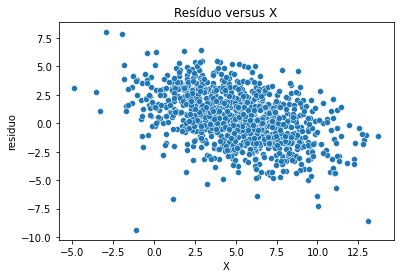

In [48]:
sns.scatterplot(y = dados['residuo'], x = dados['X'])
plt.title('Resíduo versus X')

## E se a relação entre y e X não for linear?

In [49]:
# criando um novo dataset
X = np.random.normal(5, 3, 1000)
y = 2*X**2 + np.random.normal(0, 2, 1000) + 5
dados = pd.DataFrame(zip(X,y), columns=['X', 'y'])

In [50]:
dados

,X,y
0,7.256166,105.823494
1,8.942198,163.354223
2,9.110348,168.582213
3,4.481319,44.662113
4,3.999490,35.198184
...,...,...
995,7.038893,105.397227
996,1.020481,5.147690
997,6.273116,82.275229
998,5.876482,76.809376


In [51]:
#agora temos 
modelo = LinearRegression()
modelo.fit(X=dados[['X']], y=dados['y'])

LinearRegression()

In [52]:
dados['y_predito'] = modelo.predict(dados[['X']])

Text(0.5, 0, 'X - variável independente')

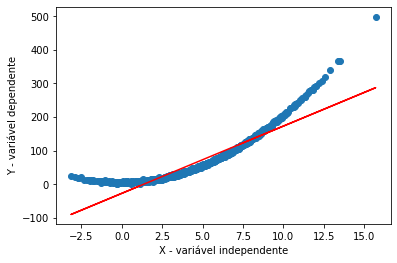

In [53]:
plt.scatter(dados['X'], dados['y'])
plt.plot(dados['X'], dados['y_predito'], color='red')
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')

Pela figura acima, claramente uma reta não é capaz de capturar o comportamento da variável y. Isso também se reflete nos residuos:

In [54]:
dados['residuo'] = dados['y_predito'] - dados['y']

Text(0.5, 1.0, 'Histograma dos resíduos')

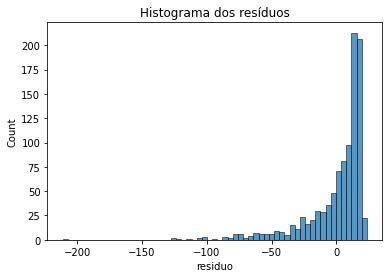

In [55]:
hist = sns.histplot(dados['residuo'])
plt.title("Histograma dos resíduos")

Text(0.5, 1.0, 'Resíduo versus y')

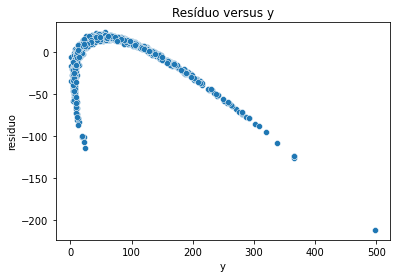

In [56]:
sns.scatterplot(y = dados['residuo'], x = dados['y'])
plt.title('Resíduo versus y')

<b> <font color="green"> CALMA! AINDA EXISTEM ALTERNATIVAS! </font> </b> 

Relação não linear entre x e y? Resíduos totalmente não aleatórios? Você ainda pode continuar usando regressão linear! Aqui sabemos que a variável resposta Y tem uma dependência com X², podemos ajustar então uma regressão linear em relação a X², ao invés de X:

In [57]:
dados['X_quadrado'] = dados['X']**2

In [58]:
#agora temos um novo modelo em função de X² 
modelo = LinearRegression()
modelo.fit(X=dados[['X_quadrado']], y=dados['y'])

LinearRegression()

In [59]:
dados['y_predito'] = modelo.predict(dados[['X_quadrado']])

Text(0.5, 0, 'X² - variável independente')

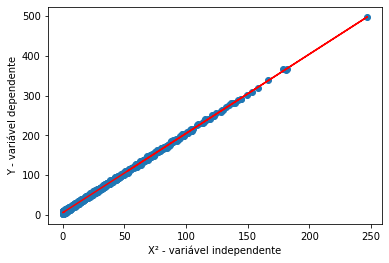

In [60]:
plt.scatter(dados['X_quadrado'], dados['y'])
plt.plot(dados['X_quadrado'], dados['y_predito'], color='red')
plt.ylabel('Y - variável dependente')
plt.xlabel('X² - variável independente')

In [61]:
dados['residuo'] = dados['y_predito'] - dados['y']

Text(0.5, 1.0, 'Histograma dos resíduos')

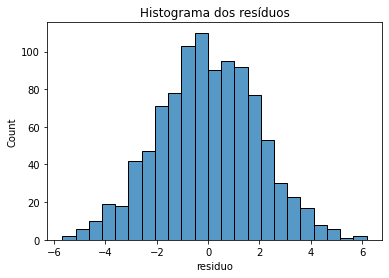

In [62]:
hist = sns.histplot(dados['residuo'])
plt.title("Histograma dos resíduos")

Algumas transformações que você pode fazer na variável independente (X) do modelo:

- X², X³
- log(X)
- exp(X)
- Boxcox(X) para transformar a distribuição em normal

Também existe a possibilidade de transformar a própria resposta do modelo. Nesse caso, a relação entre y e x² é linear.  E se fizessemos uma regressão de raiz(y) por x?

Poderiamos fazer isso da mesma forma como foi feito acima, criando uma nova coluna calculando a raiz quadrada de y. Mas ao recuperar qualquer resultado da predição, precisariamos lembrar de fazer a resposta² para retornar ao valor original de y. O sklearn possui uma funcionalidade para transformar automaticamente a resposta do modelo:

In [63]:
from sklearn.compose import TransformedTargetRegressor

In [64]:
modelo_transformado = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.sqrt,
    inverse_func=np.square
)

Assim, essa função automaticamente ira aplicar raiz quadrada ao fazer a regressão, e elevar ao quadrado após a predição

In [65]:
modelo_transformado.fit(X=dados[['X']], y=dados['y'])

TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                           regressor=LinearRegression())

In [66]:
dados['y_pred_transformado'] = modelo_transformado.predict(dados[['X']])

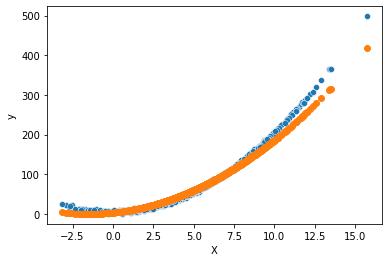

In [67]:
sns.scatterplot(x=dados['X'], y=dados['y'])
plt.scatter(x=dados['X'], y=dados['y_pred_transformado'])

<b> <font color='blue'> DICA </font> </b>: Quando trabalhando com regressão linear ou modelos que precisem de distribuição normal, se a variável resposta (y) não apresentar esse comportamento, aplicar transformações nela pode tornar possivel a modelagem (e ajudar no desempenho). Você pode utilizar os gráficos de residuos para determinar se uma transformação pode ser útil. Exemplos de transformação:

- log(y)
- box-cox(y)

Na verdade, essas transformações na variável resposta são o primeiro passo para uma generalização do modelo de regressão linear <b> (Generalized Linear Models ou GLM) </b>. Nele, a premissa é que exista uma relação linear entre a <b> variável y transformada </b> e as entradas (X), mas não necessáriamente que y seja linear em relação a X. Além disso, podemos generalizar a premissa da distribuição dos residuos para outra que não seja a normal. Vamos falar sobre um exemplo especial de GLM logo mais, a <b> regressão logística </b>.

Para se aprofundar: https://towardsdatascience.com/generalized-linear-models-9ec4dfe3dc3f

# Regressão linear multipla

Trabalhando com dados reais, são grandes as chances de estarmos interessados em obter um modelo que leve em conta diversas variáveis ao invés de uma. A regressão linear pode ser extendida para esses casos também:

In [68]:
from sklearn.datasets import load_diabetes

In [69]:
raw_data = load_diabetes()

In [70]:
print(raw_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [71]:
features = raw_data['feature_names']

In [72]:
dados = pd.DataFrame(raw_data['data'], columns = features)
dados['y'] = raw_data['target']

In [73]:
dados.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [74]:
modelo_diabetes = LinearRegression()

In [75]:
modelo_diabetes.fit(X=dados[features], y=dados['y'])

LinearRegression()

In [76]:
dados['y_pred'] = modelo_diabetes.predict(dados[features])

Text(0.5, 0, 'Medido')

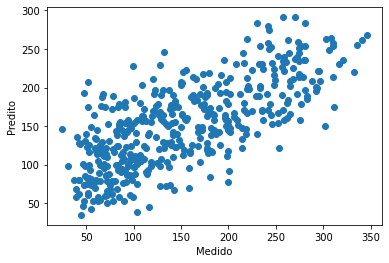

In [77]:
plt.scatter(y = dados['y_pred'], x= dados['y'])
plt.ylabel('Predito')
plt.xlabel('Medido')

Quando ajustamos um modelo de regressão linear multipla, as mesmas premissas do modelo com uma variável devem ser respeitadas. Existem bibliotecas especializadas que auxiliam a entender se as premissas estão sendo respeitadas, realizando os devidos testes estatísticos:

In [78]:
import statsmodels.api as sm

Lembrando, caso não tenha, é necessário instalar:

In [79]:
!pip install statsmodels

In [80]:
features = [x for x in dados.columns if x not in ['y', 'y_pred']]

In [81]:
modelo_ols = sm.OLS(dados['y'],dados[features]).fit()

In [82]:
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Tue, 19 Oct 2021   Prob (F-statistic):                    4.72e-07
Time:                        03:13:28   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Para maiores referências sobre interpretação da tabela acima: https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

# Validação cruzada

Podemos usar uma das funções de score para estimar o desempenho desse ajuste:

In [83]:
mean_absolute_error(dados['y'], dados['y_pred'])

43.27739508374988

Como falamos antes, estimar o erro do modelo com a mesma informação na qual ele foi treinado pode ser problemático, pois não temos acesso a uma população dos dados, apenas amostras.

E se o modelo está se ajustando especialmente bem a esses dados, e não ao comportamento geral do fenômeno? Podemos utilizar o próprio conjunto de dados para estimar qual seria o erro do modelo em dados ainda não vistos. Isso pode ser feito de algumas formas:

1) Deixar de fora um pedaço dos conjunto de dados (aleatório ou não). Treinar o modelo usando uma parte e testar usando outra:

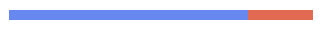

In [84]:
Image('../figures/train_test_split.png')

Aqui, as barras representam o tamanho do dataset (em linhas). O dataset em azul é a porção do treino, e em laranja é a porção do teste

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train,test = train_test_split(dados, test_size=0.2, shuffle=False)

In [87]:
dados.shape

(442, 12)

In [88]:
train.shape

(353, 12)

In [89]:
test.shape

(89, 12)

In [90]:
modelo_diabetes.fit(X=train[features], y=train['y'])

LinearRegression()

In [103]:
test['y_pred'] = modelo_diabetes.predict(test[features])

<ipython-input-103-ae4a98b4de1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = modelo_diabetes.predict(test[features])


In [92]:
mean_absolute_error(test['y'], test['y_pred'])

42.54819305780145

Existem outras formas que podem ou não ser mais adequadas. A mais comumente utilizada é conhecida como K-fold cross validation. Dividimos o nosso dataset em "K" pedaços. Treinamos com  (K-1) pedaços e medimos o erro com o pedaço (K) que restou:

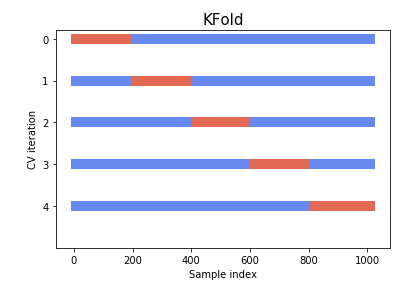

In [93]:
Image('../figures/kfold.png')

FONTE: https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

In [94]:
from sklearn.model_selection import KFold

In [95]:
kfold_splitter = KFold(n_splits=5)

In [96]:
folds = list(kfold_splitter.split(X=dados))

In [97]:
folds[0]

(array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
        258, 259, 260, 261, 262, 263, 264, 265, 266

Não precismos ajustar manualmente um modelo para cada train fold. O sklearn traz uma funcionalidade para isso:

In [98]:
from sklearn.model_selection import cross_validate

In [99]:
cv_scores = cross_validate(
    estimator = modelo_diabetes, 
    X=dados[features], 
    y=dados['y'], 
    cv=KFold(shuffle=True), 
    scoring='neg_mean_absolute_error'
)

Obs: a função 'neg_mean_absolute_error' é a mesma que computamos anteriormente, porém por padrão todas as scoring functions são ajustadas para que quanto maior seu valor, melhor seja o desempenho do modelo.

- Scoring function: quanto maior, melhor
- Loss function: quanto menor, melhor

In [100]:
pd.DataFrame(cv_scores).mean()

fit_time       0.005599
score_time     0.003585
test_score   -44.909960
dtype: float64

In [101]:
from sklearn.metrics import SCORERS 

In [102]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

# Revisando

Nessa seção aprendemos alguns conceitos fundamentais da tarefa de aprendizado supervisionado: <b> variáveis dependentes, independentes, loss function, parâmetros, estratégias de validação </b>.

- Regressão linear é um modelo simples e rápido de ser ajustado. Os coeficientes também são diretamente interpretáveis
- Necessário verificar se as premissas do modelo estão sendo respeitadas
- É possível modelar relações não lineares, transformando as variáveis de entrada ou resposta(idealmente com conhecimento do domínio do problema)
- Relações y vs X podem ser apenas parcialmente lineares. É possivel ajustar varios sub-modelos restritos a um dominio
- Atenção aos outliers!
- O erro nos dados de treino não será necessariamente igual ao erro do modelo quando em produção 